Lab 3.1: Analyze Customer Reviews to determine whether the reviews are positive, negative or neutral.

Step 1: Importing Necessary Libraries

In [ ]:
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/ramar92/NLP-Dataset/main/customer_reviews.csv"

In [ ]:
df = pd.read_csv(url)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  10 non-null     object
dtypes: object(1)
memory usage: 212.0+ bytes
None


In [ ]:
# Displaying top 5 row values

df.head()

,Review
0,I love this product! It's amazing and works pe...
1,This is the worst experience I've ever had.
2,"The product is okay, but I expected something ..."
3,Absolutely fantastic! Would buy again.
4,Not worth the price. Completely disappointed.


In [ ]:
import nltk
nltk.download('vader_lexicon')
# Valence Aware Dictionary sEntiment Reasoner

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
def get_sentiment(score):
  if score > 0:
    return 'Positive'
  elif score < 0:
    return 'Negative'
  else:
    return 'Neutral'

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
list1 = [lambda x: sia.polarity_scores(x)]
print(list1[0]("The product is good"))

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}


In [ ]:
df['Compound'] = df['Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
df['Compound']

,Compound
0,0.9259
1,-0.6249
2,0.6486
3,0.6352
4,-0.6198
5,-0.5486
6,0.8356
7,-0.7096
8,-0.3950
9,0.9200


In [ ]:
df['Sentiment'] = df['Compound'].apply(get_sentiment)
df['Sentiment']

,Sentiment
0,Positive
1,Negative
2,Positive
3,Positive
4,Negative
5,Negative
6,Positive
7,Negative
8,Negative
9,Positive


In [ ]:
df.head()

,Review,Compound,Sentiment
0,I love this product! It's amazing and works pe...,0.9259,Positive
1,This is the worst experience I've ever had.,-0.6249,Negative
2,"The product is okay, but I expected something ...",0.6486,Positive
3,Absolutely fantastic! Would buy again.,0.6352,Positive
4,Not worth the price. Completely disappointed.,-0.6198,Negative


Performing Visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

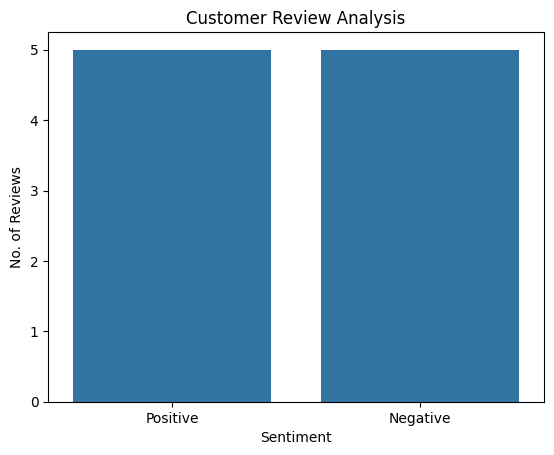

In [ ]:
sns.countplot(x = 'Sentiment', data = df)
plt.title('Customer Review Analysis')
plt.xlabel("Sentiment")
plt.ylabel("No. of Reviews")
plt.show()